In [1]:
import os 
import random
import shutil
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [2]:
data_dir= ".\dataset"

In [3]:
total_dir = len(os.listdir(data_dir))
total_files = 0

for dirname, _, fnames in os.walk(data_dir):
    print('counting:', dirname)
    f_counter = 0
    for f in fnames:
        f_counter += 1
    total_files += f_counter
    print('total files in dir:', f_counter)

print('--------')
print('total number of files',total_files)
print('total number of directories',total_dir)

counting: .\dataset
total files in dir: 0
counting: .\dataset\Andreas
total files in dir: 100
counting: .\dataset\Boy Satria
total files in dir: 100
counting: .\dataset\Channel
total files in dir: 100
counting: .\dataset\Evan
total files in dir: 100
counting: .\dataset\fedrick
total files in dir: 100
counting: .\dataset\Ivan
total files in dir: 100
counting: .\dataset\Laura
total files in dir: 100
counting: .\dataset\Mariana
total files in dir: 100
counting: .\dataset\Martinus
total files in dir: 100
counting: .\dataset\Winner
total files in dir: 100
--------
total number of files 1000
total number of directories 10


In [4]:
train_dir = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=100
)

val_dir = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 1000 files belonging to 10 classes.
Using 800 files for training.
Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [5]:
class_names = train_dir.class_names
print(class_names)

['Andreas', 'Boy Satria', 'Channel', 'Evan', 'Ivan', 'Laura', 'Mariana', 'Martinus', 'Winner', 'fedrick']


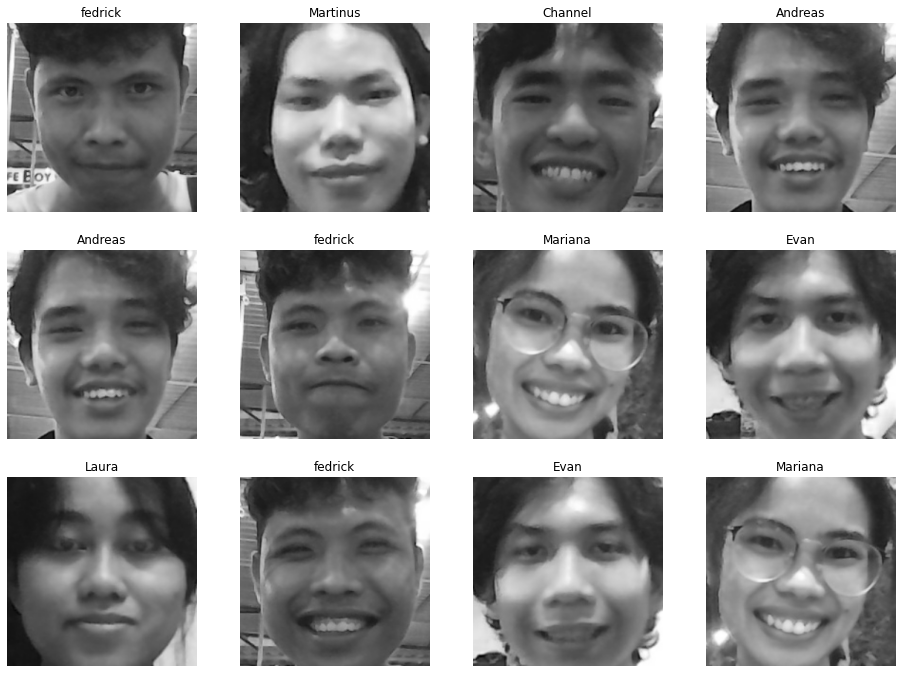

In [6]:
plt.figure(figsize=(16,16))

for imgs, labels in train_dir.take(20):
    for i in range(12):
        axis = plt.subplot(4,4,i+1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

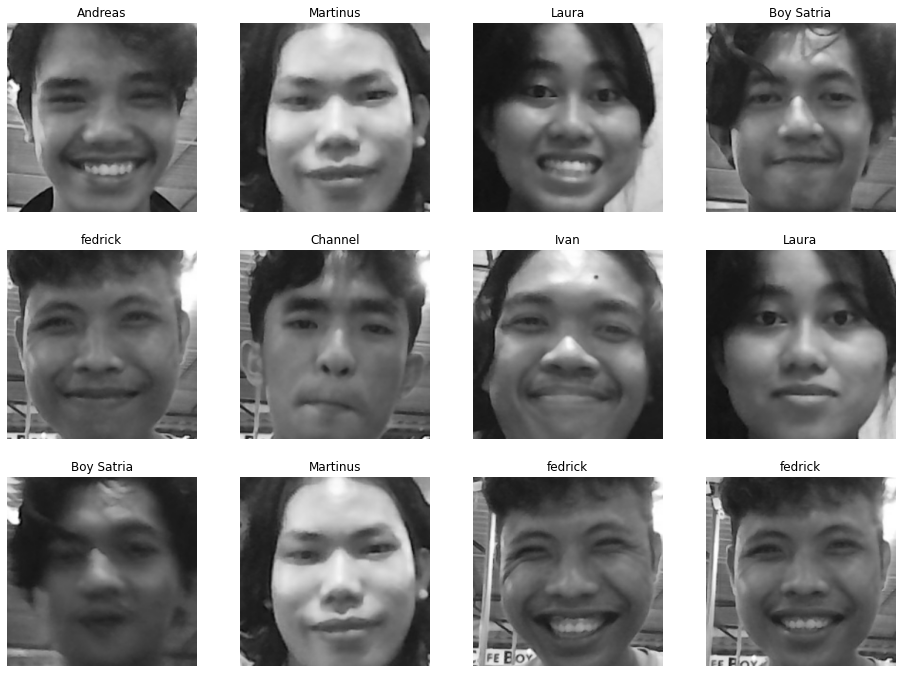

In [7]:
plt.figure(figsize=(16,16))

for imgs, labels in val_dir.take(2):
    for i in range(12):
        axis = plt.subplot(4,4,i+1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
train_batch = train_dir.as_numpy_iterator().next()

print('total of bathces : ', len(train_dir))
print('images batch shape : ', train_batch[0].shape)
print('labels batch shape : ', train_batch[1].shape)

total of bathces :  25
images batch shape :  (32, 256, 256, 3)
labels batch shape :  (32,)


In [9]:
val_batch = train_dir.as_numpy_iterator().next()

print('total of bathces : ', len(val_dir))
print('images batch shape : ', val_batch[0].shape)
print('labels batch shape : ', val_batch[1].shape)

total of bathces :  7
images batch shape :  (32, 256, 256, 3)
labels batch shape :  (32,)


Build Architecture Model

In [10]:
from tensorflow.keras.optimizers import Adam


def create_model ():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', padding='same', input_shape=(256,256,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
    
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(11, activation='softmax'))
    
    
    model.compile(optimizer = Adam (lr=0.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model


In [11]:
model = create_model()

c:\Users\wijay\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

Fitting Model

In [13]:
history = model.fit(train_dir,
                    epochs = 10,
                    validation_data = val_dir,
                    verbose = 2)

Epoch 1/10
25/25 - 35s - loss: 1.9518 - accuracy: 0.3537 - val_loss: 0.9630 - val_accuracy: 0.8100 - 35s/epoch - 1s/step
Epoch 2/10
25/25 - 33s - loss: 0.6019 - accuracy: 0.8100 - val_loss: 0.1818 - val_accuracy: 0.9400 - 33s/epoch - 1s/step
Epoch 3/10
25/25 - 33s - loss: 0.1823 - accuracy: 0.9362 - val_loss: 0.0420 - val_accuracy: 0.9850 - 33s/epoch - 1s/step
Epoch 4/10
25/25 - 33s - loss: 0.0845 - accuracy: 0.9712 - val_loss: 0.0340 - val_accuracy: 0.9950 - 33s/epoch - 1s/step
Epoch 5/10
25/25 - 33s - loss: 0.0410 - accuracy: 0.9912 - val_loss: 0.0315 - val_accuracy: 0.9900 - 33s/epoch - 1s/step
Epoch 6/10
25/25 - 33s - loss: 0.0550 - accuracy: 0.9787 - val_loss: 0.0544 - val_accuracy: 0.9800 - 33s/epoch - 1s/step
Epoch 7/10
25/25 - 34s - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0183 - val_accuracy: 0.9950 - 34s/epoch - 1s/step
Epoch 8/10
25/25 - 34s - loss: 0.0300 - accuracy: 0.9950 - val_loss: 0.0022 - val_accuracy: 1.0000 - 34s/epoch - 1s/step
Epoch 9/10
25/25 - 34s - loss: 0

Visualize The Accuracy and Loss

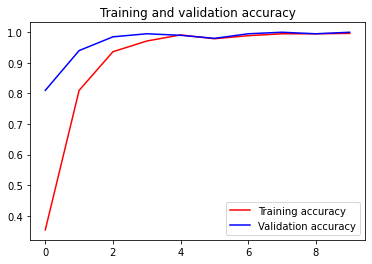

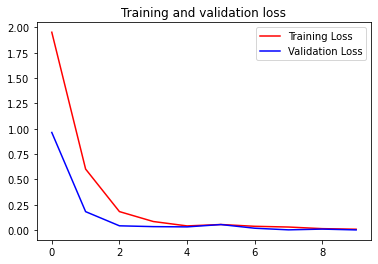

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate The Model

In [15]:
loss, accuracy = model.evaluate(val_dir)
print("tes akurasi : ", accuracy)
print("tes loss : ", loss)

7/7 [==============================] - 3s 397ms/step - loss: 0.0016 - accuracy: 1.0000
tes akurasi :  1.0
tes loss :  0.001569555141031742


Test Model With Test Set

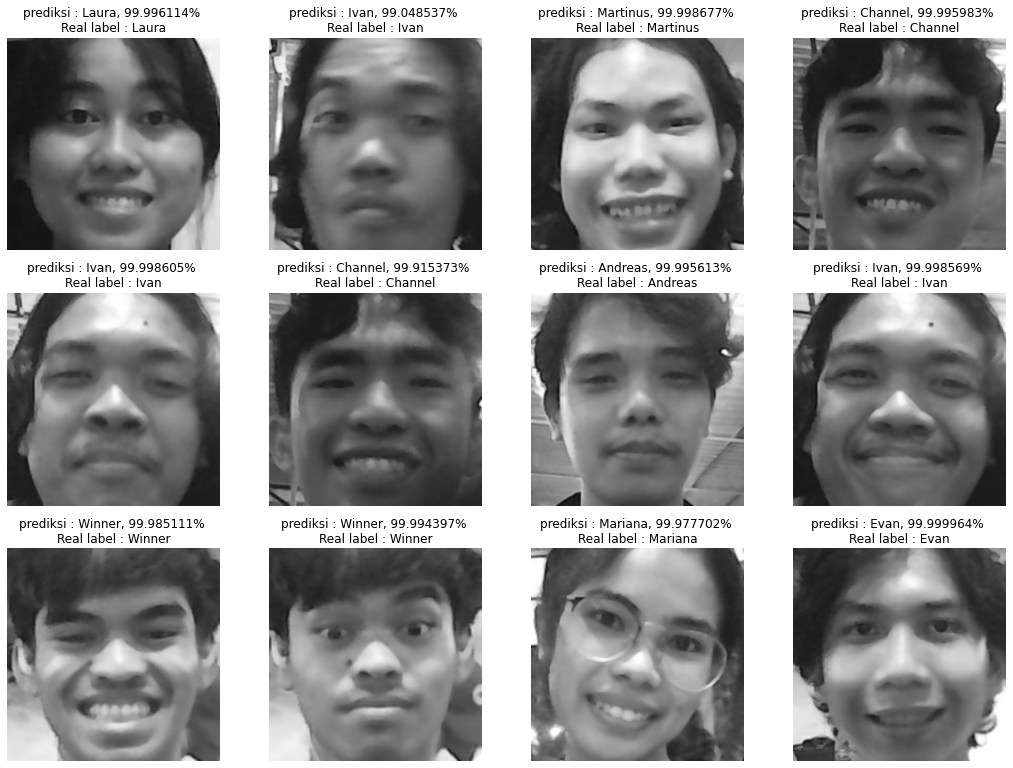

In [16]:
img_batch, label_batch = val_dir.as_numpy_iterator().next()

inference = model.predict_on_batch(img_batch)

plt.figure(figsize=(18,18))

for i in range(12):
    axis = plt.subplot(4,4,i+1)
    plt.imshow(img_batch[i].astype("uint8"))
    plt.title('prediksi : {}, {:2f}% \nReal label : {}'.format(class_names[np.argmax(inference[i])],100 * np.max(inference[i]), class_names[label_batch[i]]))
    plt.axis("off")

In [34]:
model.save('model_1.h5')



Convert Model to TFLite

In [36]:
export_dir = 'model_1/'

tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model_1.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


2426592